### Double EMA

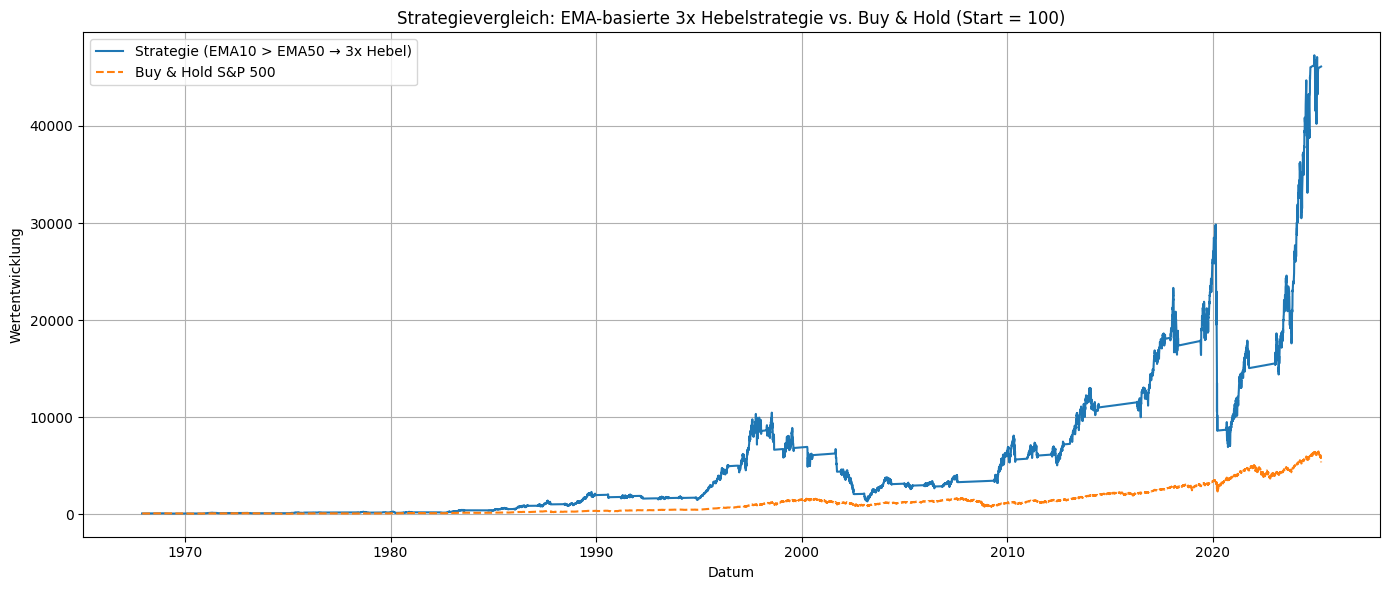

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
spx = pd.read_csv(
    "data/SPX.csv",
    sep=";",
    usecols=["Date", "Close"],
    parse_dates=["Date"]
)
spx["Date"] = pd.to_datetime(spx["Date"], format="mixed", dayfirst=False, errors="coerce")
spx = spx.sort_values("Date")
spx["Price"] = spx["Close"].astype(str).str.replace(",", "").astype(float)

# Optional: nur späterer Zeitraum
spx = spx.iloc[10000:].reset_index(drop=True)
spx = spx[["Date", "Price"]]

# EMAs berechnen
spx["EMA10"] = spx["Price"].ewm(span=200, adjust=False).mean()
spx["EMA50"] = spx["Price"].rolling(window=200).mean()

# Tagesrenditen berechnen
spx["Return"] = spx["Price"].pct_change()

# Bedingung für gehebelt oder nicht (Signal vom Vortag)
spx["Prev_EMA10_GT_EMA50"] = spx["EMA10"].shift(1) > spx["EMA50"].shift(1)

# Strategie-Rendite: 3x Hebel wenn Bedingung erfüllt, sonst 0.0001
spx["Strategy_Return"] = spx.apply(
    lambda row: 3 * row["Return"] if row["Prev_EMA10_GT_EMA50"] else 0.0001,
    axis=1
)

# Strategie-Performance mit Startwert 100
spx["Strategy_Value"] = 100 * (1 + spx["Strategy_Return"]).cumprod()
spx["Buy_and_Hold"] = 100 * (1 + spx["Return"]).cumprod()

# Plotten
plt.figure(figsize=(14, 6))
plt.plot(spx["Date"], spx["Strategy_Value"], label="Strategie (EMA10 > EMA50 → 3x Hebel)")
plt.plot(spx["Date"], spx["Buy_and_Hold"], label="Buy & Hold S&P 500", linestyle="--")
plt.legend()
plt.title("Strategievergleich: EMA-basierte 3x Hebelstrategie vs. Buy & Hold (Start = 100)")
plt.xlabel("Datum")
plt.ylabel("Wertentwicklung")
plt.grid(True)
plt.tight_layout()
plt.show()



In [21]:
spx.tail()

,Date,Price,EMA10,EMA50,Return,Prev_EMA10_GT_EMA50,Strategy_Return,Strategy_Value,Buy_and_Hold
14426,2025-03-31,5488.73,5621.908822,5775.979400,-0.015019,False,0.0001,145578.607985,5808.179894
14427,2025-04-01,5558.52,5610.383582,5767.451580,0.012715,False,0.0001,145593.165846,5882.031746
14428,2025-04-02,5571.48,5603.310203,5759.766420,0.002332,False,0.0001,145607.725163,5895.746032
14429,2025-04-03,5390.83,5564.677439,5745.298325,-0.032424,False,0.0001,145622.285935,5704.582011
14430,2025-04-04,5069.90,5474.717905,5718.812117,-0.059533,False,0.0001,145636.848164,5364.973545


### Single EMA

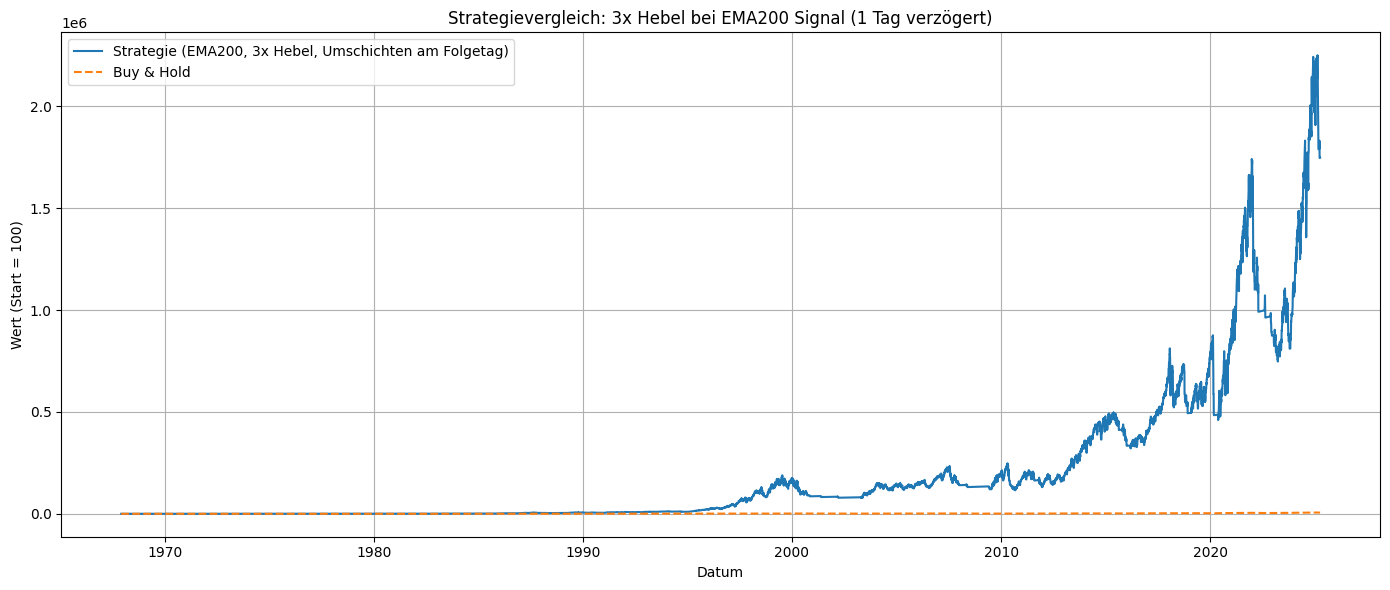

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
spx = pd.read_csv(
    "data/SPX.csv",
    sep=";",
    usecols=["Date", "Close"],
    parse_dates=["Date"]
)
spx["Date"] = pd.to_datetime(spx["Date"], format="mixed", dayfirst=False, errors="coerce")
spx = spx.sort_values("Date")
spx["Price"] = spx["Close"].astype(str).str.replace(",", "").astype(float)
spx = spx[["Date", "Price"]]
spx = spx.iloc[10000:].reset_index(drop=True)

# EMA200 berechnen
spx["EMA200"] = spx["Price"].ewm(span=200, adjust=False).mean()

# Tagesrenditen
spx["Return"] = spx["Price"].pct_change()

# Signal definieren: Investiert wenn Kurs > EMA200 am Vortag
spx["Signal"] = (spx["Price"] > spx["EMA200"]).shift(1)

# Strategie-Rendite
spx["Strategy_Return"] = spx.apply(
    lambda row: 3 * row["Return"] if row["Signal"] else 0.0001,
    axis=1
)

# Performance mit Startwert 100
spx["Strategy_Value"] = 100 * (1 + spx["Strategy_Return"]).cumprod()
spx["Buy_and_Hold"] = 100 * (1 + spx["Return"]).cumprod()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(spx["Date"], spx["Strategy_Value"], label="Strategie (EMA200, 3x Hebel, Umschichten am Folgetag)")
plt.plot(spx["Date"], spx["Buy_and_Hold"], label="Buy & Hold", linestyle="--")
plt.title("Strategievergleich: 3x Hebel bei EMA200 Signal (1 Tag verzögert)")
plt.xlabel("Datum")
plt.ylabel("Wert (Start = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
